# Clasificación utilizando XGBoost (Core)

**Objetivo**  
Implementar un pipeline completo de machine learning para un problema de clasificación utilizando **XGBoost**. El proceso incluirá el análisis exploratorio de datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

**Dataset**: Heart Disease UCI  

**Descripción del Dataset:**  
El dataset de enfermedades del corazón de la UCI contiene información sobre varios factores de riesgo asociados con enfermedades cardíacas. El objetivo es predecir la presencia de enfermedad cardíaca basándose en estos factores.

---

## **Instrucciones**

### 1. Carga y Exploración Inicial de Datos:
- Cargar el dataset desde Kaggle o una fuente local.
- Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
- Identificar y documentar los valores faltantes y outliers presentes en el dataset.

### 2. Análisis Exploratorio de Datos (EDA):
- **Análisis Estadístico Descriptivo:**
  - Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
  - Analizar la distribución de las variables categóricas.
- **Visualizaciones:**
  - Crear histogramas y gráficos de barras para comprender la distribución de las variables.
  - Utilizar un mapa de calor para visualizar las correlaciones entre las variables.
  - Emplear gráficos de dispersión para identificar posibles relaciones entre las características.
- **Detección de Valores Faltantes y Outliers:**
  - Detectar y tratar valores faltantes utilizando técnicas adecuadas.
  - Identificar y manejar outliers que puedan influir en el modelo.

### 3. Preprocesamiento de Datos:
- **Transformación de Columnas:**
  - Codificar variables categóricas utilizando One-Hot Encoding.
  - Escalar las características numéricas utilizando `StandardScaler`.
- **División del Dataset:**
  - Dividir los datos en conjuntos de entrenamiento y prueba (train/test split).

### 4. Implementación de XGBoost:
- **Entrenamiento del Modelo:**
  - Entrenar un modelo básico de XGBoost con hiperparámetros predeterminados.
  - Evaluar el modelo inicial utilizando métricas como exactitud, precisión, recall, F1-Score y ROC-AUC.
- **Optimización de Hiperparámetros:**
  - Implementar `GridSearchCV` para buscar la mejor combinación de hiperparámetros.
  - Evaluar el rendimiento del modelo optimizado y compararlo con el modelo básico.

### 5. Evaluación de Modelos:
- Generar un informe detallado de las métricas del modelo optimizado.
- Crear y analizar una matriz de confusión.
- Visualizar la curva ROC para medir la capacidad del modelo de distinguir entre clases.

---

## **Entregables**
- Notebook de Jupyter con el análisis completo, incluyendo EDA, preprocesamiento, entrenamiento y optimización del modelo.
- Gráficos y visualizaciones relevantes para explicar las decisiones tomadas.
- Código y documentación subidos a un repositorio de GitHub.
- Crear un tag de liberación (`v1.0.0`) para esta versión del proyecto en GitHub.

**Nota:** Asegúrate de documentar cada paso, incluyendo justificaciones detalladas de las decisiones tomadas durante el análisis, preprocesamiento y modelado. Esto ayudará a proporcionar claridad y estructura al proyecto.


In [156]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import calculate_null
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from xgboost import XGBClassifier

# Cargar el dataset
df = pd.read_csv(
    r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_2_machine_learning\10_clasificacion_utilizando_xgboost\data\heart_disease_uci.csv',
    encoding='latin1'
)
df.head().T  # Primeras 5 filas

,0,1,2,3,4
id,1,2,3,4,5
age,63,67,67,37,41
sex,Male,Male,Male,Male,Female
dataset,Cleveland,Cleveland,Cleveland,Cleveland,Cleveland
cp,typical angina,asymptomatic,asymptomatic,non-anginal,atypical angina
trestbps,145.0,160.0,120.0,130.0,130.0
chol,233.0,286.0,229.0,250.0,204.0
fbs,True,False,False,False,False
restecg,lv hypertrophy,lv hypertrophy,lv hypertrophy,normal,lv hypertrophy
thalch,150.0,108.0,129.0,187.0,172.0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [158]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [159]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0



Distribución de las variables categóricas:

sex:
sex
Male      726
Female    194
Name: count, dtype: int64

dataset:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

cp:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

fbs:
fbs
False    692
True     138
Name: count, dtype: int64

restecg:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

exang:
exang
False    528
True     337
Name: count, dtype: int64

slope:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

thal:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


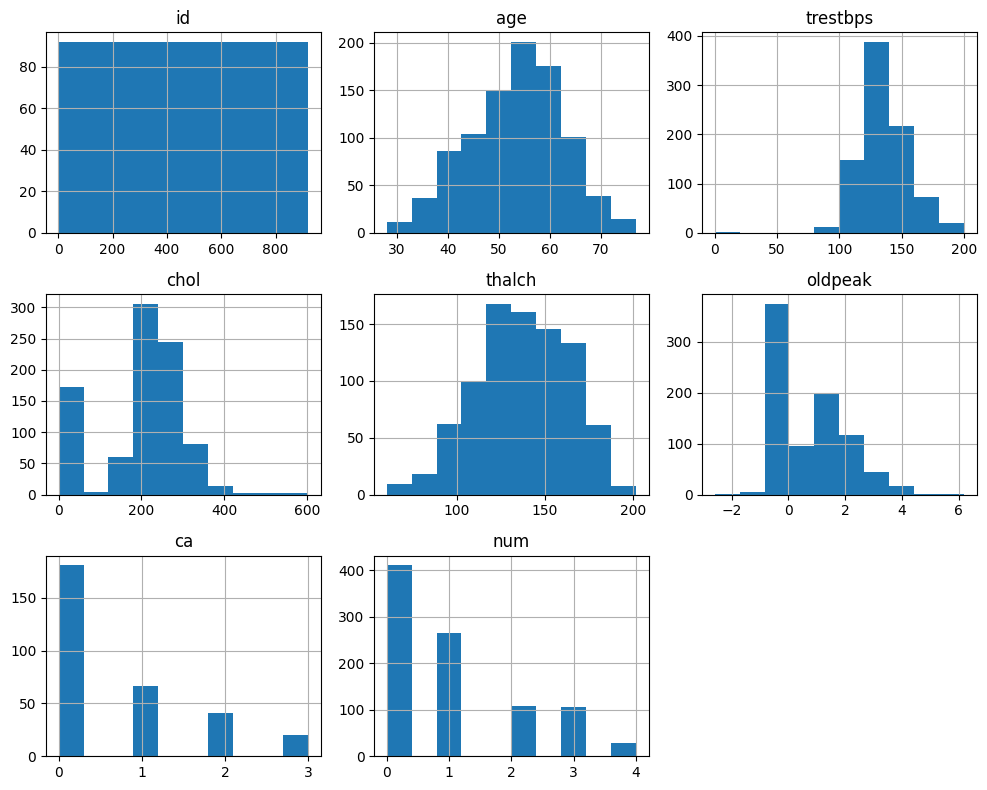

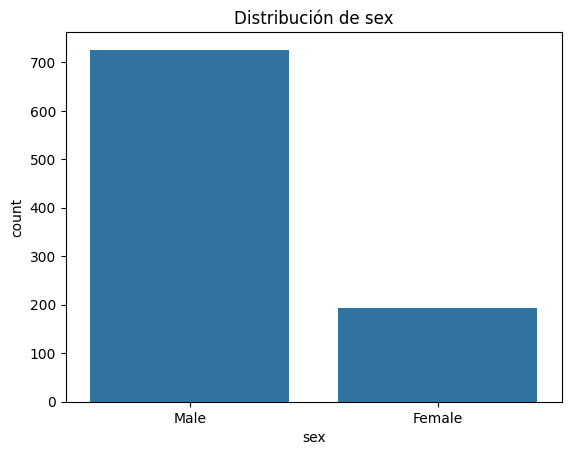

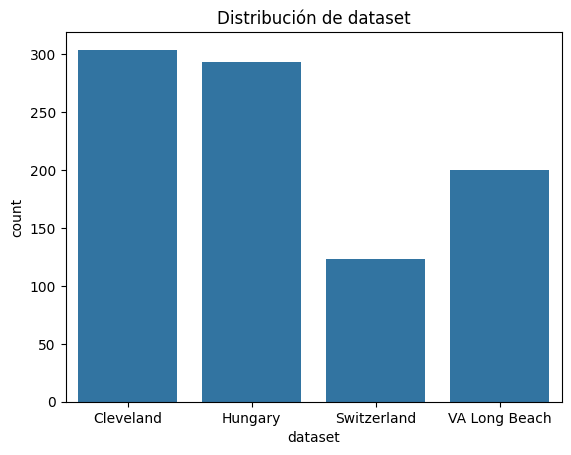

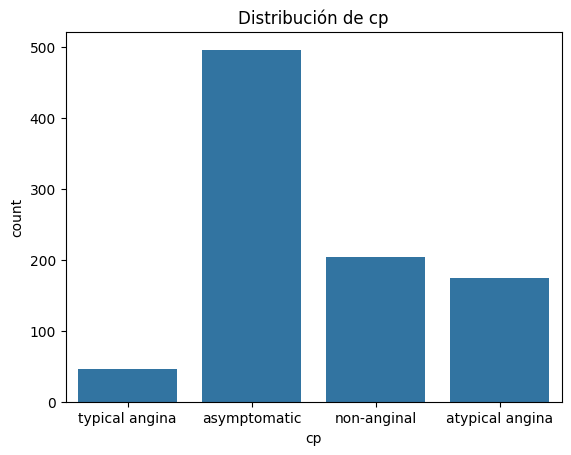

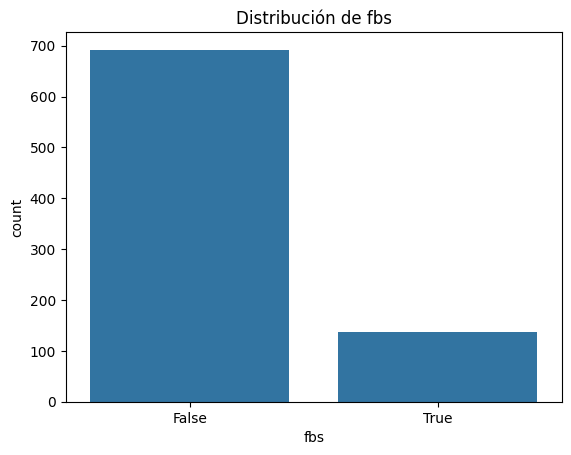

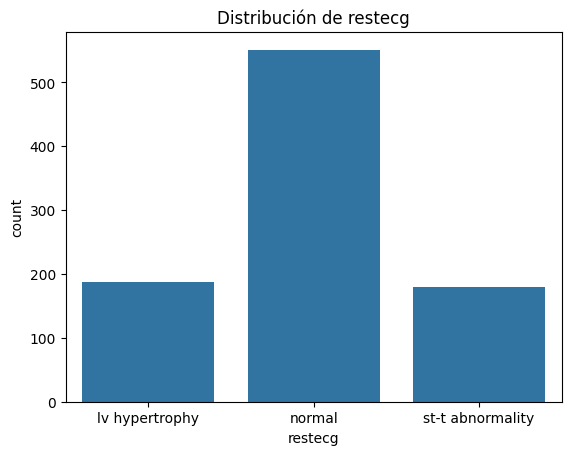

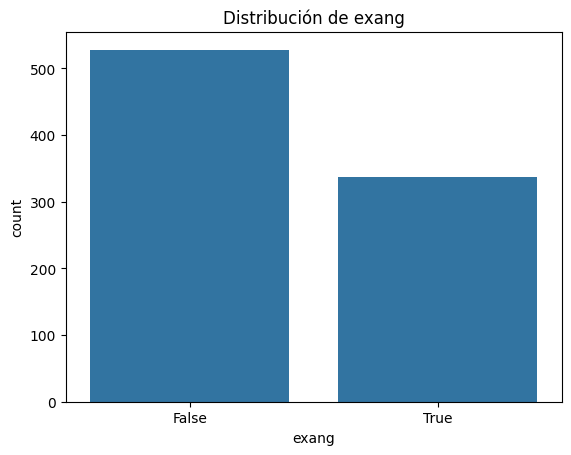

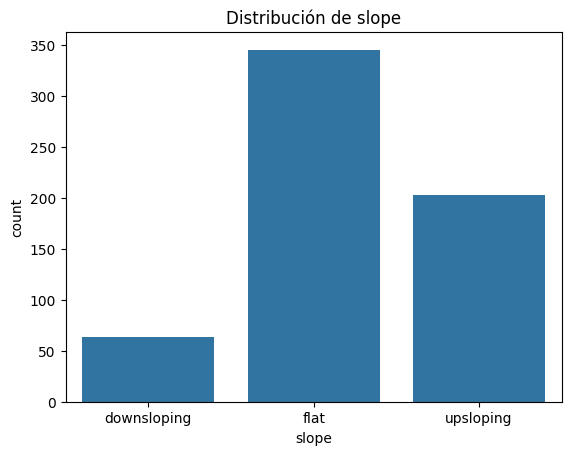

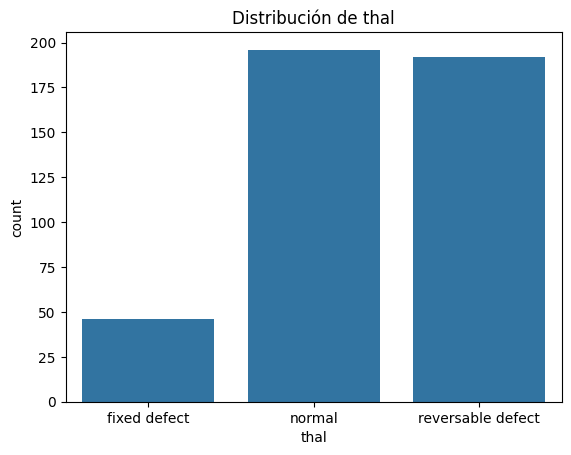

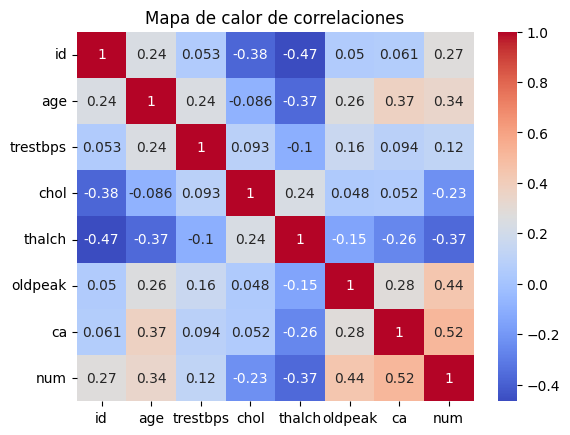

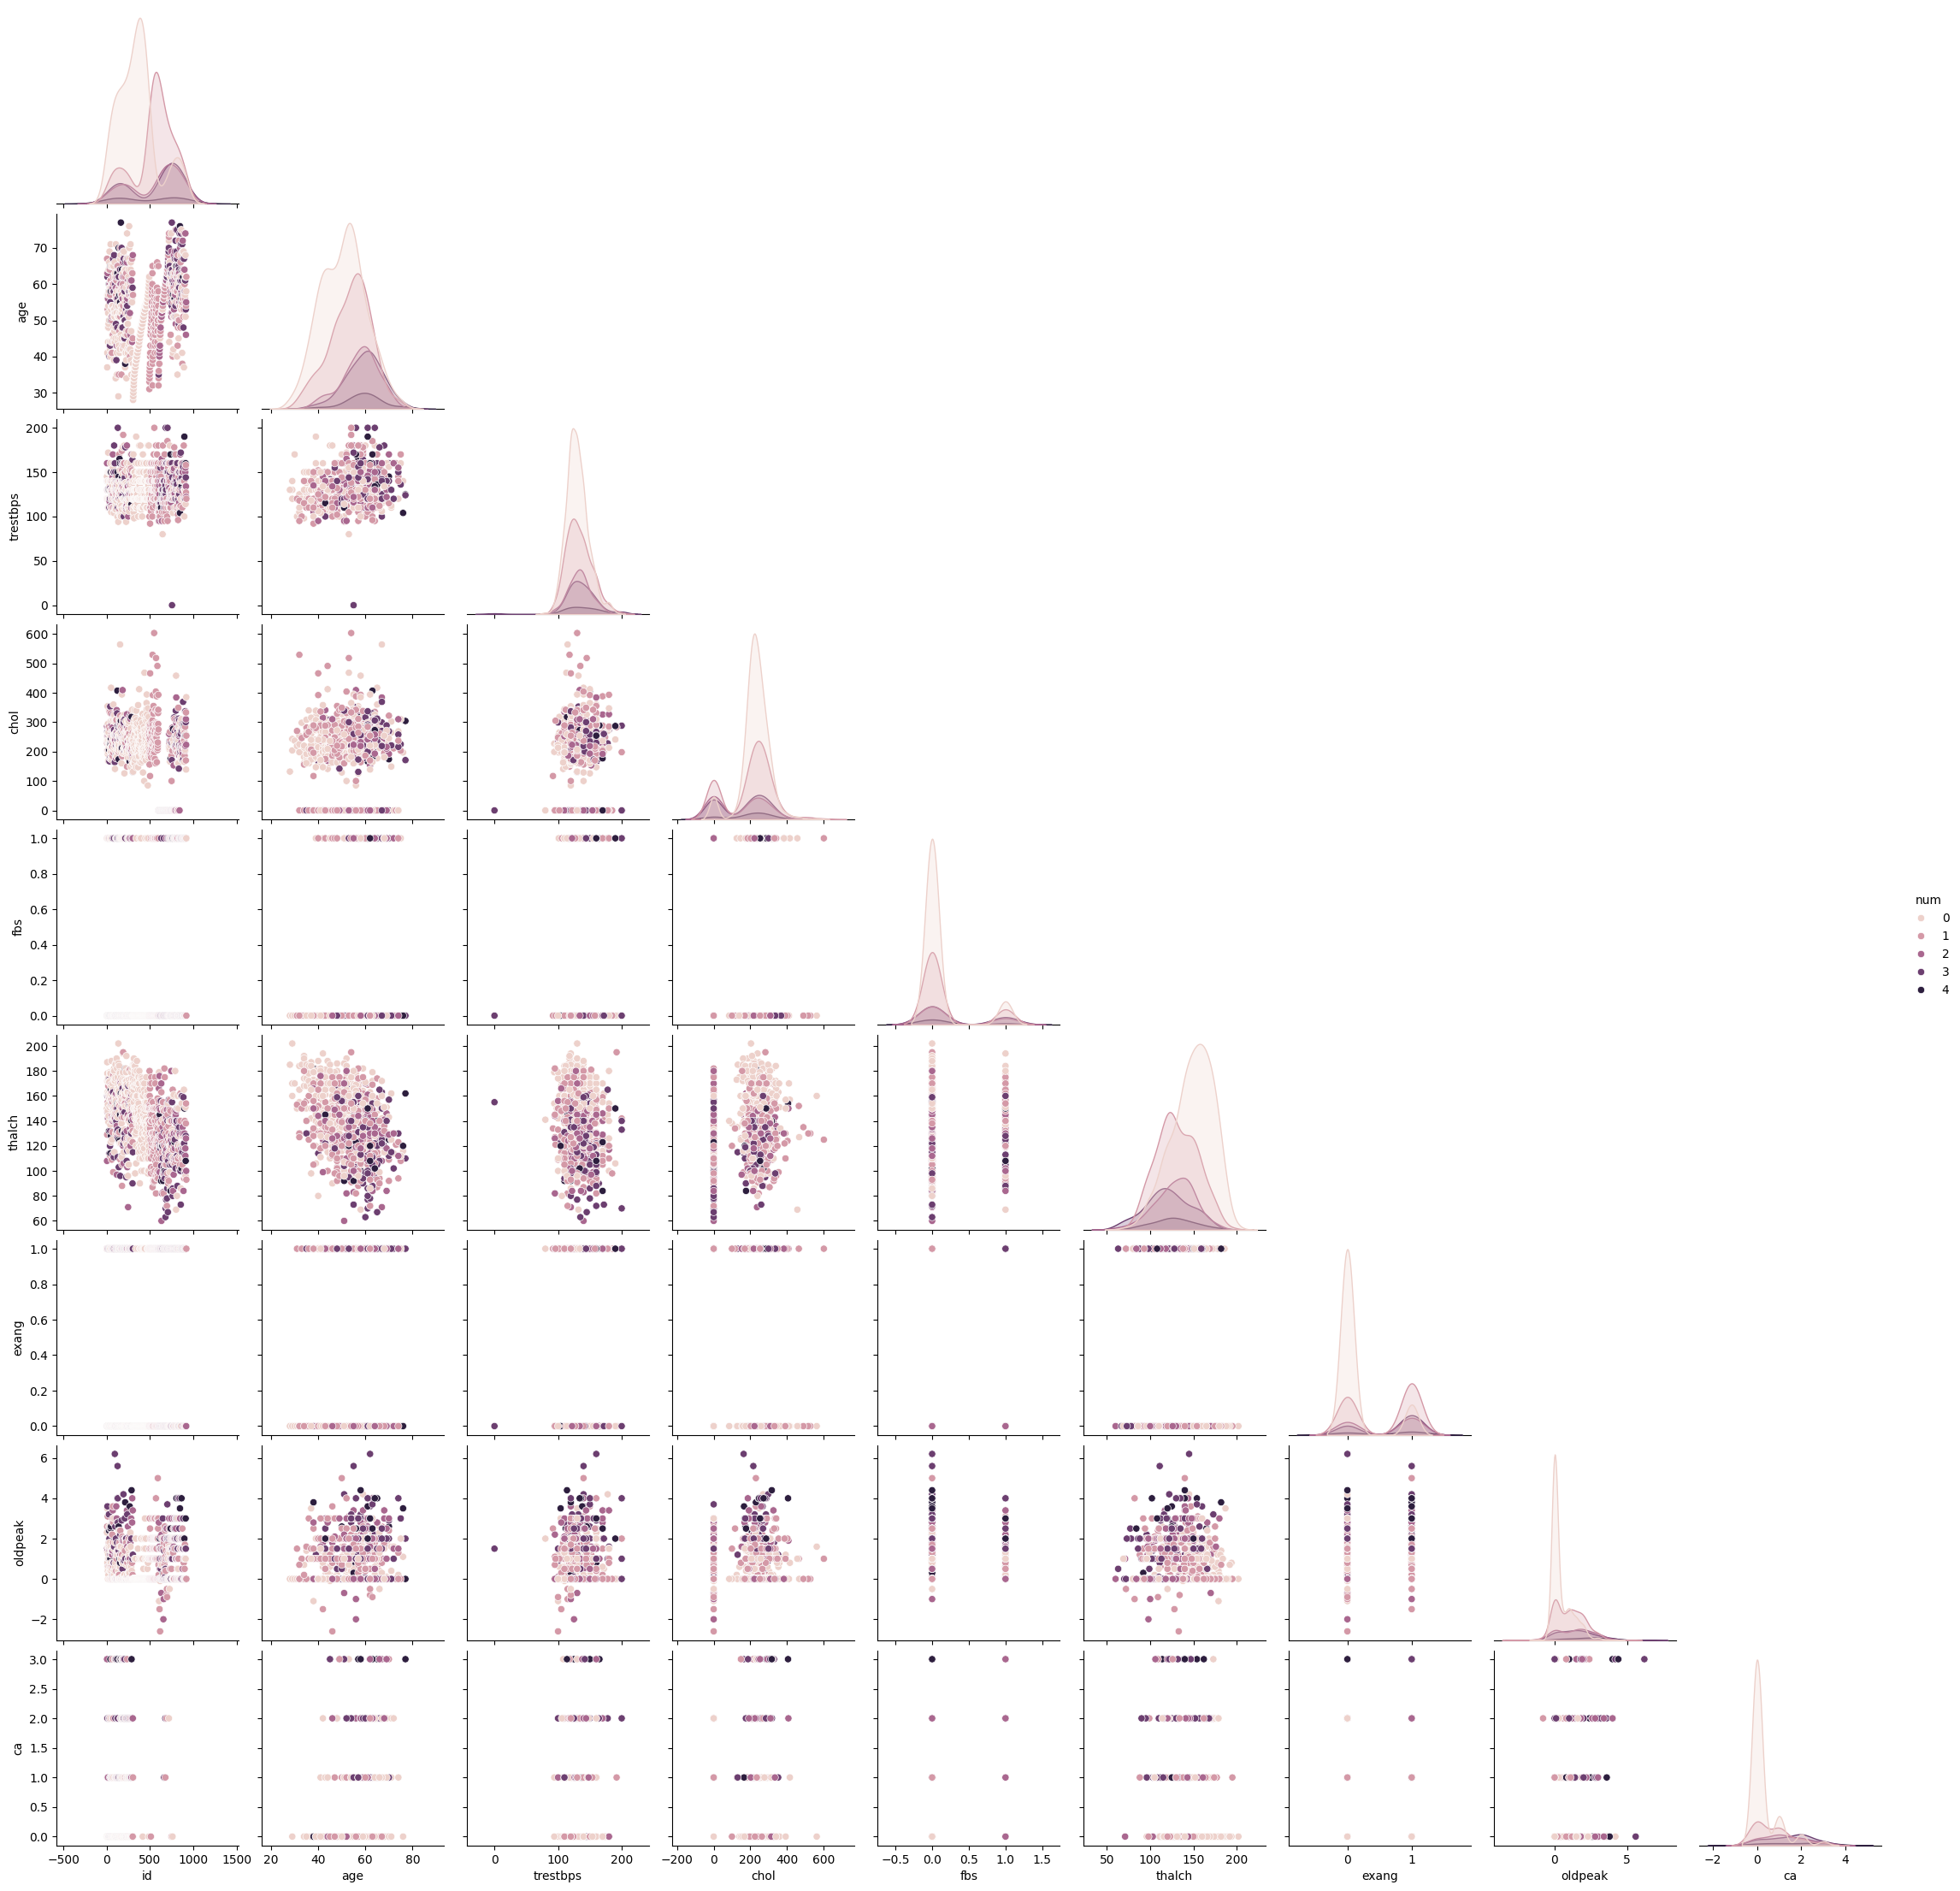

In [160]:
# Parte 2: Análisis Exploratorio de Datos (EDA)
# Análisis estadístico descriptivo
categorical_cols = df.select_dtypes(include="object").columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

print("\nDistribución de las variables categóricas:")
for col in categorical_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")

# Visualizaciones
# Histogramas para variables numéricas
df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Gráficos de barras para variables categóricas
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribución de {col}")
    plt.show()

# Mapa de calor de correlaciones
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlaciones")
plt.show()

# Gráficos de dispersión
sns.pairplot(df, hue="num", diag_kind="kde", corner=True)
plt.show()

In [161]:
calculate_null(df)

,datos sin NAs en q,Na en q,Na en %
ca,309,611,66.41
thal,434,486,52.83
slope,611,309,33.59
fbs,830,90,9.78
oldpeak,858,62,6.74
trestbps,861,59,6.41
exang,865,55,5.98
thalch,865,55,5.98
chol,890,30,3.26
restecg,918,2,0.22


In [162]:
# Manejo de valores faltantes
df["trestbps"] = df["trestbps"].fillna(df["trestbps"].median())
df["chol"] = df["chol"].fillna(df["chol"].median())
df["thalch"] = df["thalch"].fillna(df["thalch"].median())
df["oldpeak"] = df["oldpeak"].fillna(df["oldpeak"].median())
df["slope"] = df["slope"].fillna("unknown")
df["thal"] = df["thal"].fillna("unknown")
df["ca"] = df["ca"].fillna(df["ca"].mode()[0])


In [163]:
# Identificación de outliers (usando el rango intercuartílico)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


id: 0 outliers
age: 0 outliers
trestbps: 28 outliers
chol: 185 outliers
thalch: 2 outliers
oldpeak: 16 outliers
ca: 128 outliers
num: 0 outliers


In [164]:
# Parte 3: Preprocesamiento de Datos

# Codificación de variables categóricas y escalado
X = df.drop(columns=["id", "num"])  # Asegúrate de eliminar la columna "id" y "num" de X
y = df["num"]  # La columna target es 'num'

# Detectar características categóricas
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Detectar características numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Validar que las columnas categóricas y numéricas existen en X_train
missing_categorical_train = [col for col in categorical_features if col not in X_train.columns]
missing_numeric_train = [col for col in numeric_features if col not in X_train.columns]

if missing_categorical_train:
    print(f"Las siguientes columnas categóricas no están presentes en X_train: {missing_categorical_train}")
if missing_numeric_train:
    print(f"Las siguientes columnas numéricas no están presentes en X_train: {missing_numeric_train}")

# Preprocesador
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Modelo con XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(eval_metric="logloss", random_state=42))
])

# Entrenamiento
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluación del modelo básico
print("\nEvaluación del modelo básico:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

# Calcular ROC-AUC para problemas multiclase (si es aplicable)
try:
    y_pred_proba = pipeline.predict_proba(X_test)
    if len(set(y)) > 2:  # Si hay más de 2 clases
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    else:
        roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # Para un caso binario
    print(f"ROC-AUC: {roc_auc:.2f}")
except AttributeError:
    print("El modelo no soporta predict_proba para ROC-AUC.")



Evaluación del modelo básico:
Accuracy: 0.61
Precision: 0.60
Recall: 0.61
F1-Score: 0.60
ROC-AUC: 0.84


In [165]:
# Parte 4: Optimización de Hiperparámetros con GridSearchCV

from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros a explorar
param_grid = {
    "classifier__learning_rate": [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    "classifier__max_depth": [3, 5, 7],  # Profundidad máxima del árbol
    "classifier__n_estimators": [50, 100, 150],  # Número de árboles
    "classifier__subsample": [0.8, 0.9, 1.0],  # Proporción de muestras para entrenamiento
    "classifier__colsample_bytree": [0.8, 0.9, 1.0]  # Proporción de características
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(
    pipeline,  # El pipeline que contiene el preprocesador y el clasificador
    param_grid,  # El espacio de parámetros a explorar
    cv=5,  # Usamos validación cruzada con 5 pliegues
    scoring="accuracy",  # Métrica para evaluar el rendimiento
    n_jobs=-1,  # Usar todos los núcleos disponibles para la búsqueda
    verbose=1  # Imprimir información durante la búsqueda
)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros optimizados
best_model = grid_search.best_estimator_

# Evaluar el rendimiento del modelo optimizado
y_pred_optimized = best_model.predict(X_test)

# Evaluación del modelo optimizado
print("\nEvaluación del modelo optimizado:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_optimized, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_optimized, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_optimized, average='weighted'):.2f}")

# Calcular ROC-AUC para problemas multiclase (si es aplicable)
try:
    y_pred_proba_optimized = best_model.predict_proba(X_test)
    if len(set(y)) > 2:  # Si hay más de 2 clases
        roc_auc_optimized = roc_auc_score(y_test, y_pred_proba_optimized, multi_class='ovr', average='weighted')
    else:
        roc_auc_optimized = roc_auc_score(y_test, y_pred_proba_optimized[:, 1])  # Para un caso binario
    print(f"ROC-AUC: {roc_auc_optimized:.2f}")
except AttributeError:
    print("El modelo optimizado no soporta predict_proba para ROC-AUC.")

# Comparar el modelo inicial con el modelo optimizado
print("\nComparación entre el modelo inicial y el modelo optimizado:")
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Evaluación del modelo optimizado:
Accuracy: 0.62
Precision: 0.60
Recall: 0.62
F1-Score: 0.61
ROC-AUC: 0.85

Comparación entre el modelo inicial y el modelo optimizado:
Mejores hiperparámetros encontrados: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 5, 'classifier__n_estimators': 150, 'classifier__subsample': 0.8}
